# Data Aquisition

In [98]:
# import the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [99]:
# Load the data from the csv file
df = pd.read_csv('/content/Customer_Churn_Raw_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview

In [100]:
# check the shape of the data set
df.shape

(7043, 21)

In [101]:
# ratio of churners and non churners
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [102]:
# percentage of churners and non churners
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Since the percentage is not 50-50 or close to it, the data is very **Imbalanced**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Monthly Charges column has float values while total charges column values are of type object. Therefore, these need to be converted into float values as well first.

# Data Cleaning

In [104]:
# Check if any column in the dataset has missing / NaN values
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
'''
isnull(): This method is applied to the DataFrame df_copy, and it returns a
DataFrame of the same shape as df_copy, with True values where the data is
missing (NaN) and False values where it's not missing.

sum(): This method is applied to the Boolean DataFrame returned by isnull().
It calculates the sum of True values (which represent missing values) for each
column, effectively giving the count of missing values for each column.

So, df_copy.isnull().sum() will give a Series where the index represents
the column names, and the values represent the count of missing (NaN) values
for each respective column in the DataFrame df_copy.
'''
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So there are 11 missing / NaN values in Total Charges column. These need to be located first.


In [105]:
# Check the rows where the values of total charges are missing / NaN.
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The number of missing / NaN values of total charges is very small compared to total values so these can be safely ignored.

In [107]:
# Remove the rows containing NaN values of total charges
df.dropna(how = "any", inplace = True)

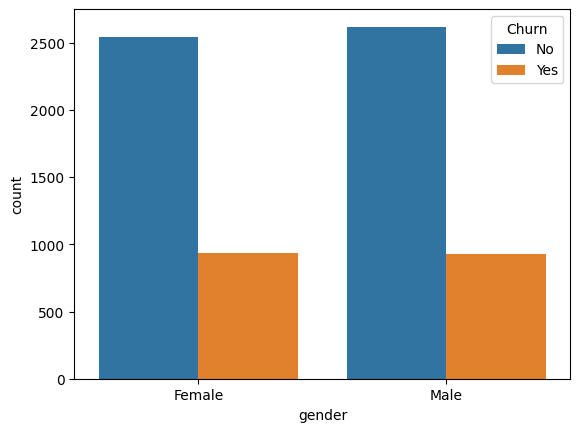

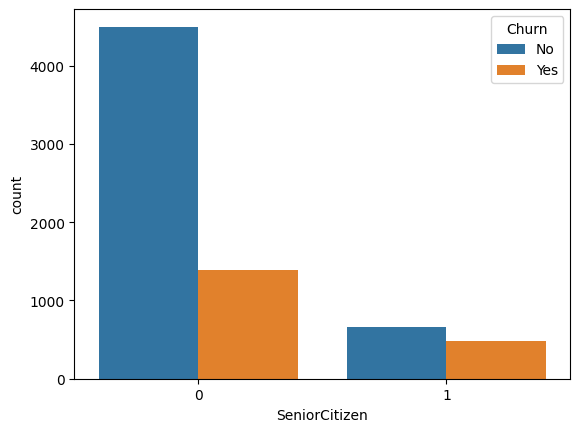

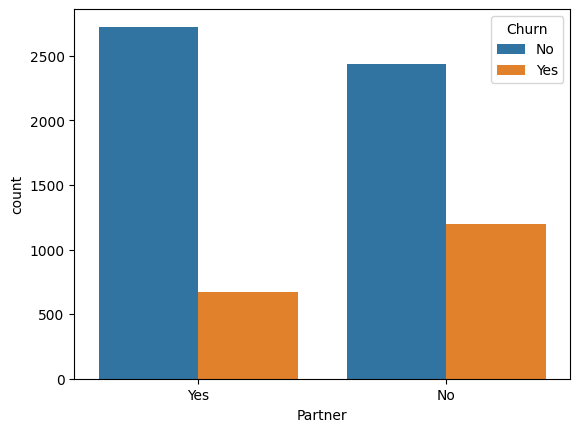

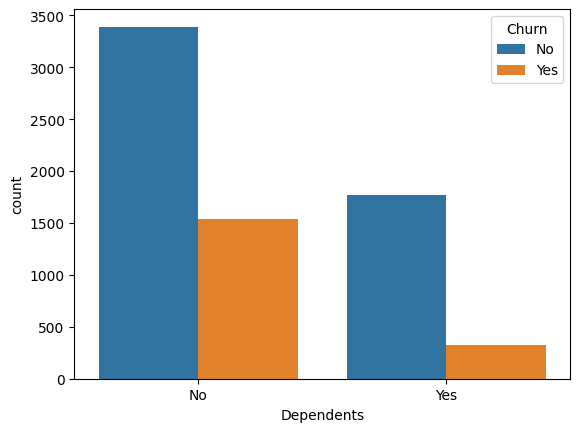

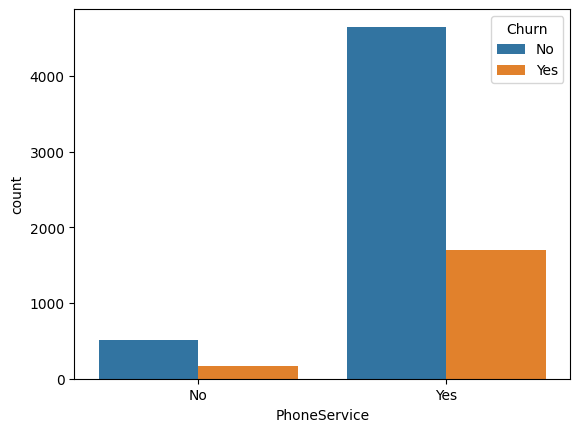

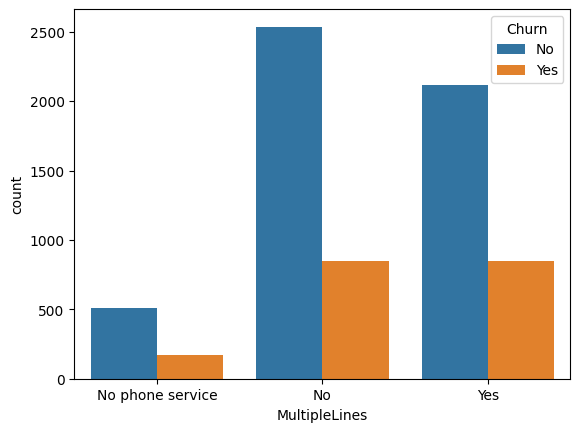

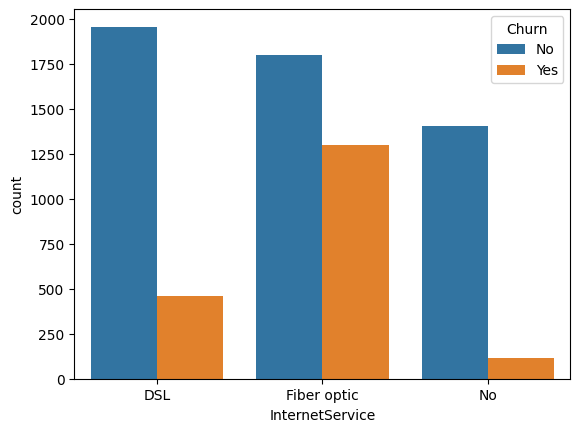

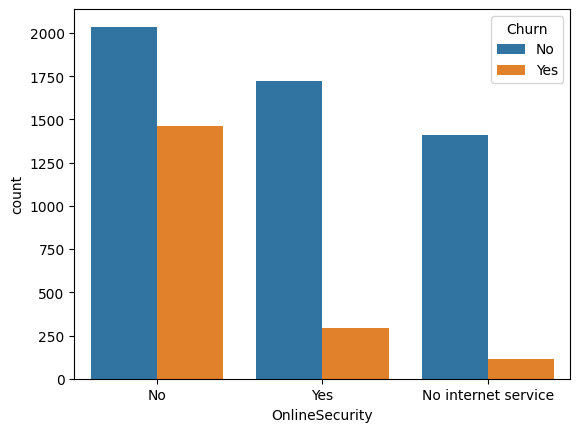

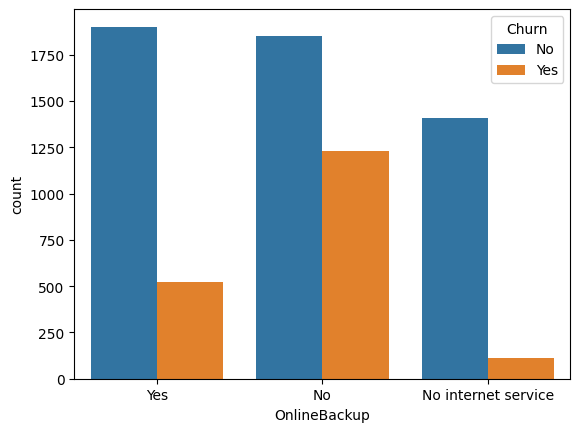

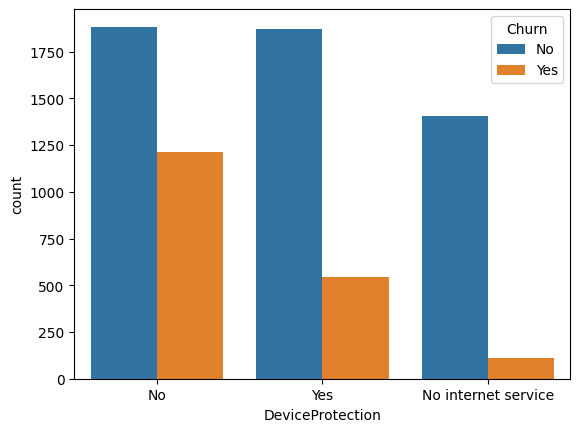

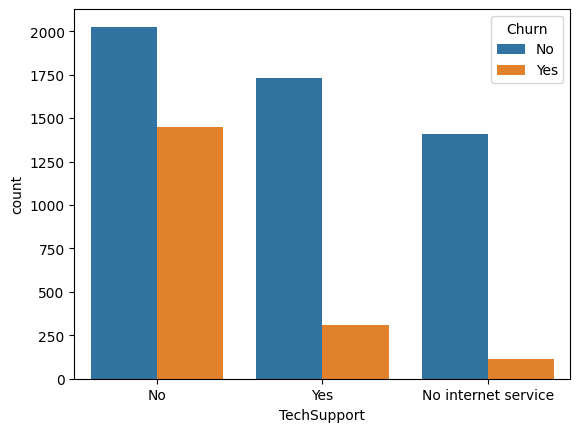

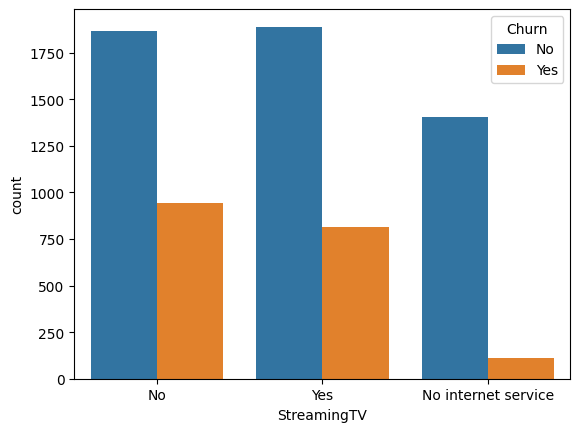

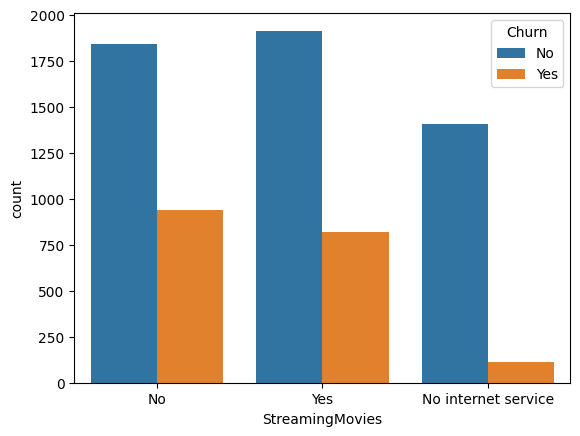

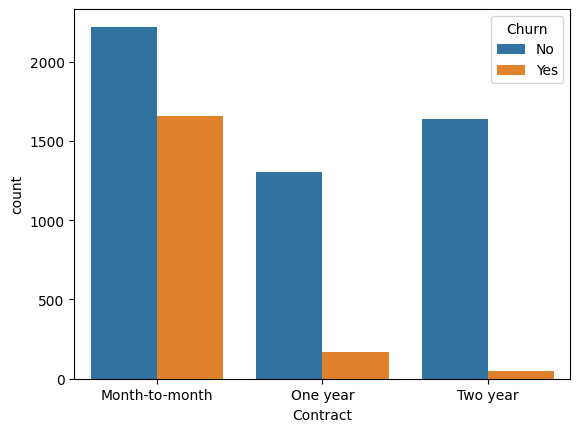

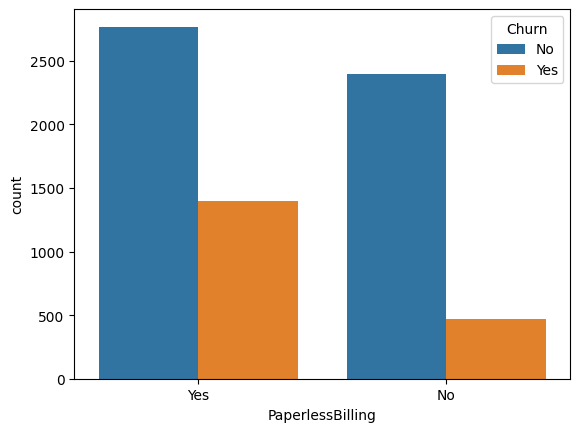

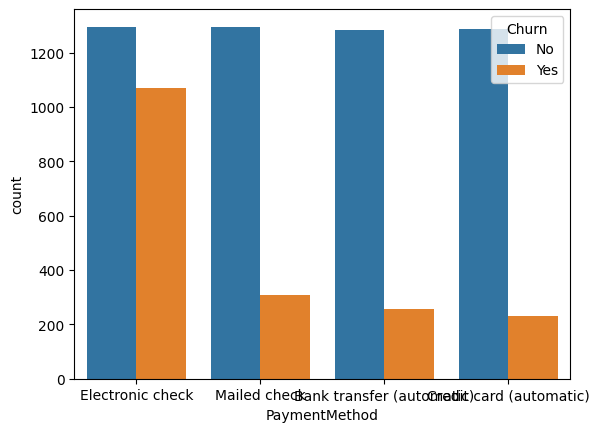

In [109]:
# Plot individual non-continuous features against the label churn.
for i, predictor in enumerate(df.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges','tenure'])):
  plt.figure(i)
  sns.countplot(data=df, x=predictor, hue='Churn')

# Data Preparation

In [110]:
# Customer ID is unique for each user and has no effect on their churn whatsoever. So drop this column.
df = df.drop(columns='customerID')

In [111]:
# Binarize all boolean values (Yes/No) into (1/0)
columns_to_binarize = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MultipleLines','Churn']
mapping = {'Female': 1, 'Male': 0, 'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}
df[columns_to_binarize] = df[columns_to_binarize].applymap(mapping.get)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [112]:
# Convert all categorical variables into indicator variables each having binary values.
df = pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [113]:
# Scale all the continuous data variables between 0 and 1 for better model accuracy
columns_to_scale = ['MonthlyCharges','TotalCharges','tenure']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


<Axes: >

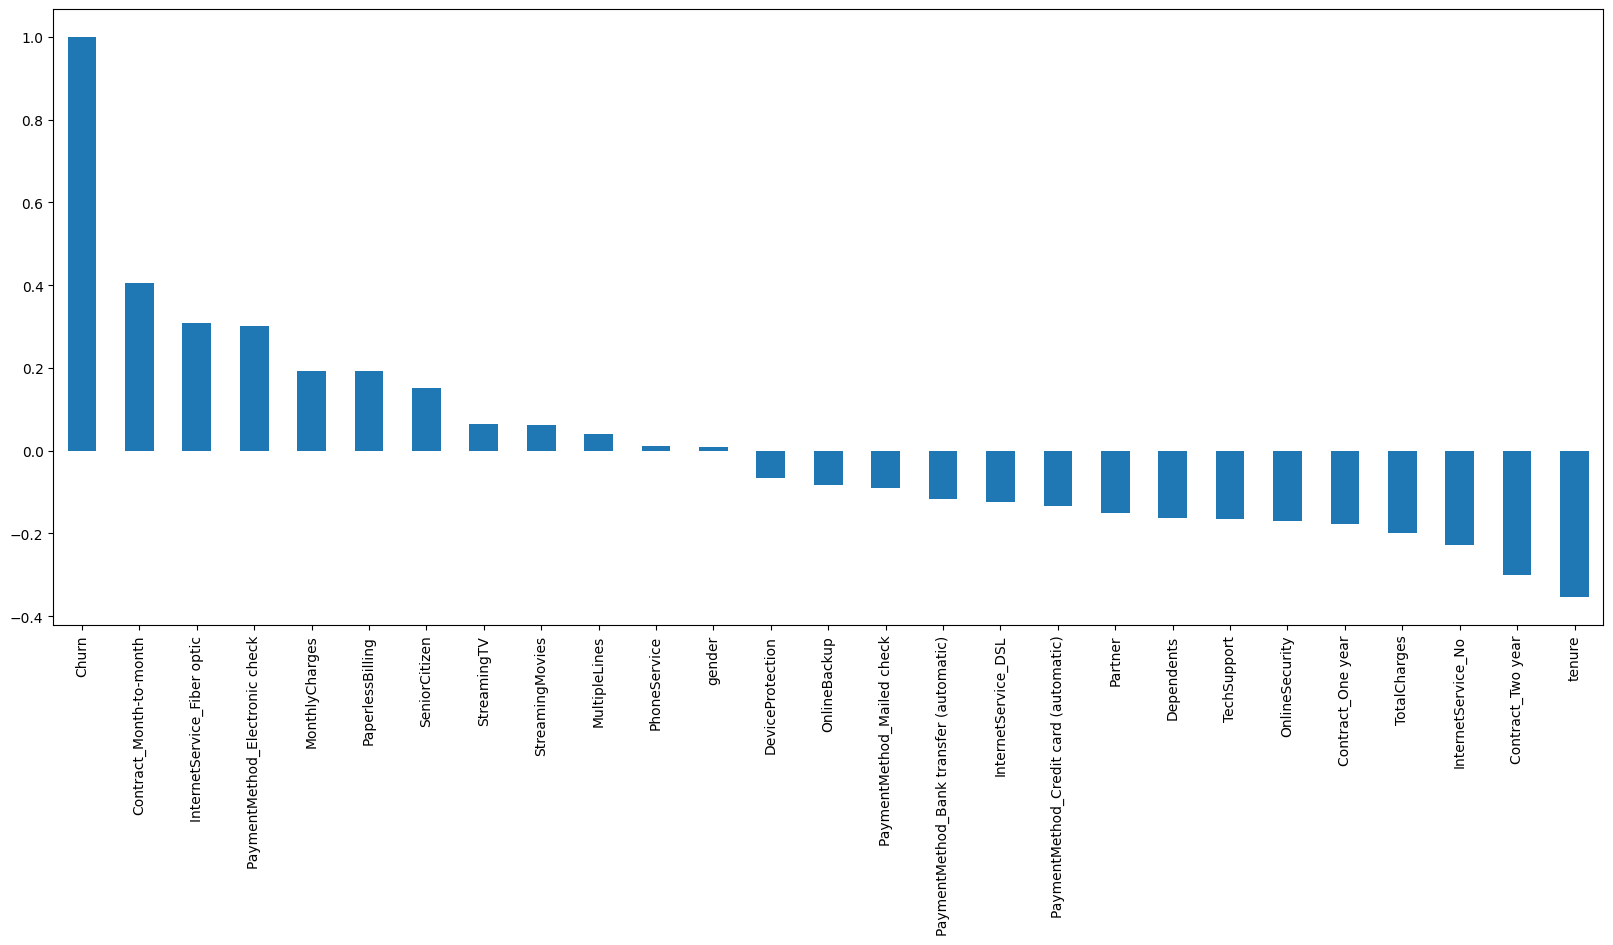

In [114]:
# Check the Correlation of all variables with the Churn variable
plt.figure(figsize = (20,8))
df.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

<Axes: >

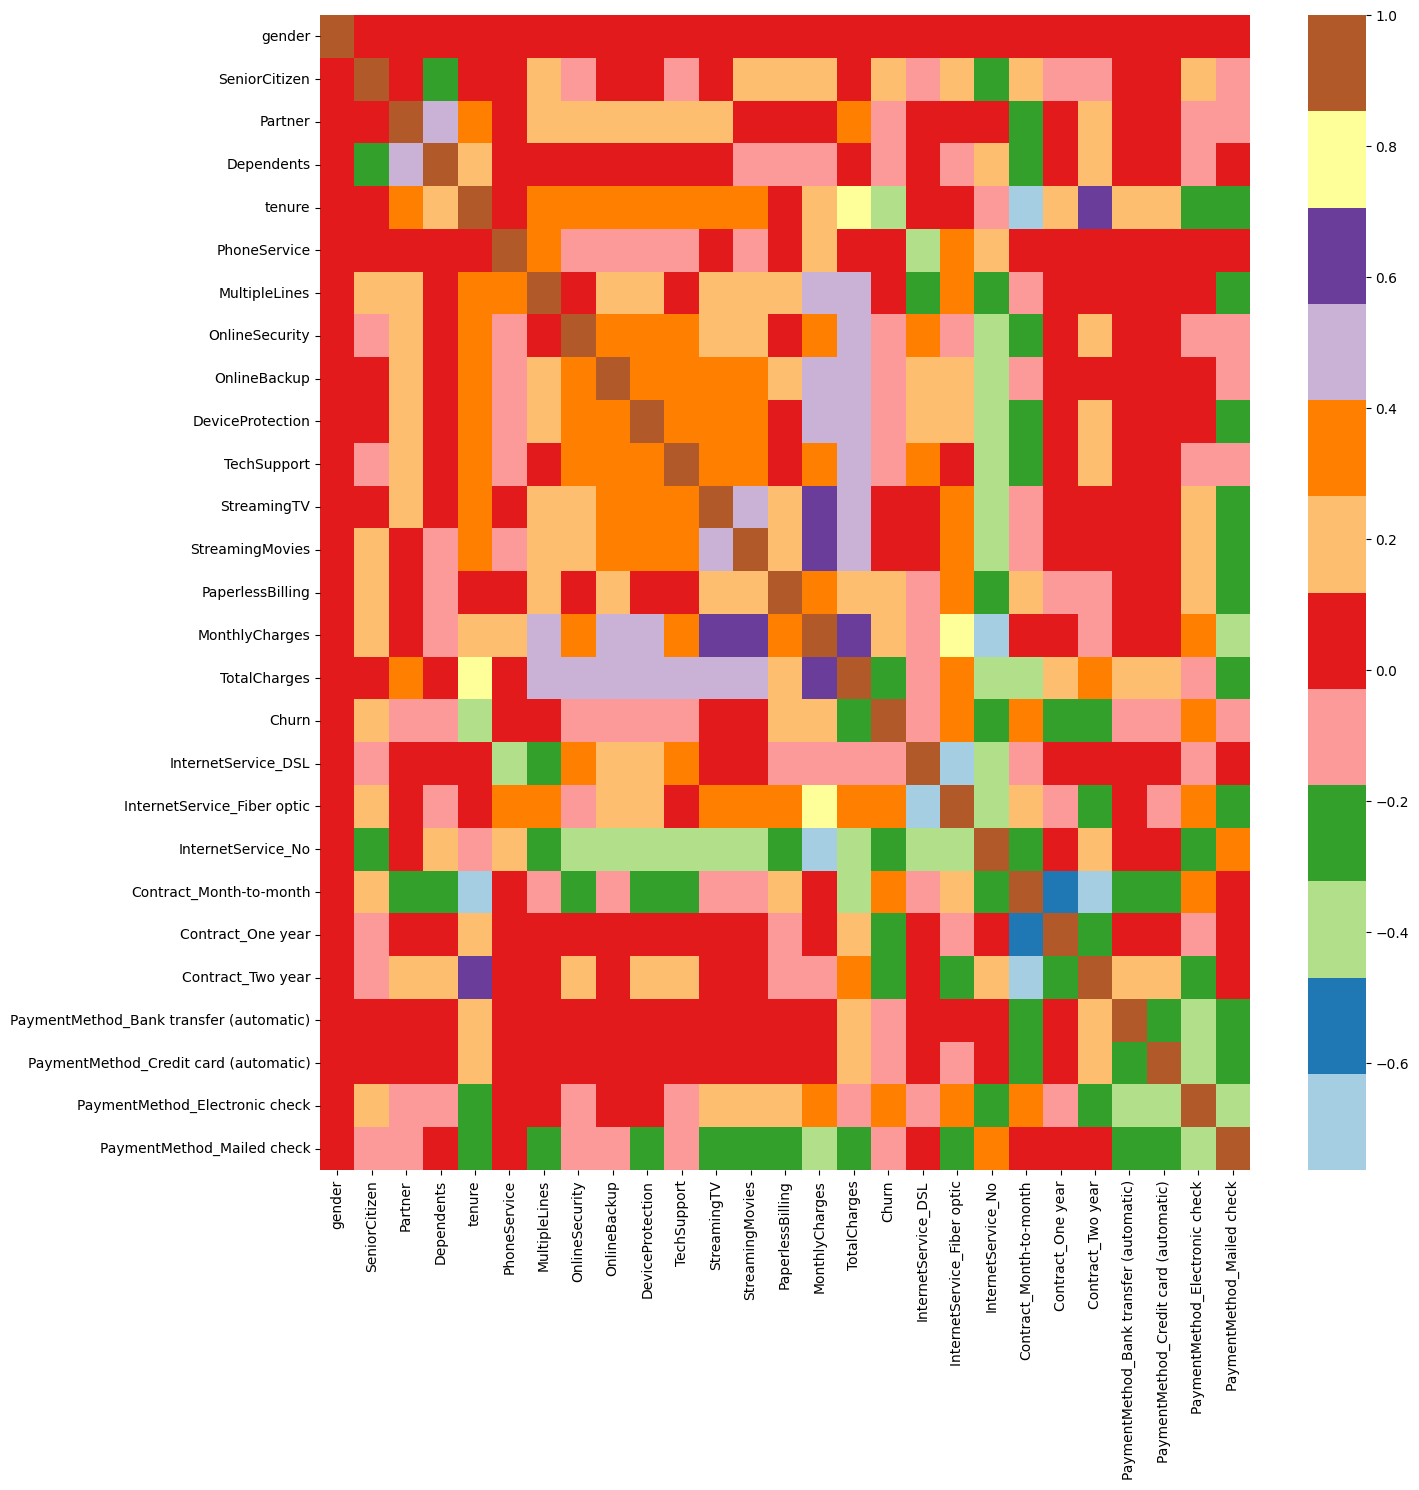

In [115]:
# Plot correlation matrix of different variables against each other
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap="Paired")

Since gender and phone service variables have minimal correlation with the churn, these can be dropped with small impact on model accuracy while increasing the performance and computation speed.

In [116]:
# Drop Gender and Phone Service columns from the data.
df = df.drop(columns=['gender', 'PhoneService'])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [117]:
# Export the processed data to a csv file.
df.to_csv('Customer_Churn_Pre_Processed_Data.csv')